In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [2]:
dir_path = "/grid/siepel/home_norepl/mo/dom_adapt/PLOS_rev/bottleneck_sims"

In [23]:
meta_df = np.genfromtxt(f'{dir_path}/Nb500_prod_survey.tsv', usecols=(1, 2, 3, 4, 5), invalid_raise=False)

In [24]:
meta_df.shape

(98123, 5)

In [25]:
meta_df.max(axis=0), meta_df.min(axis=0)

(array([ 2.000e-02, -1.000e+00,  7.999e+03,  1.132e-01,  1.000e+00]),
 array([ 1.000e-03, -3.385e+04,  1.590e+02,  9.900e-03,  5.000e-05]))

In [6]:
from scipy.stats import gaussian_kde

In [7]:
## allele age vs. f_init
xy = np.vstack([-meta_df[:, 1], meta_df[:, 3]])
z = gaussian_kde(xy)(xy)

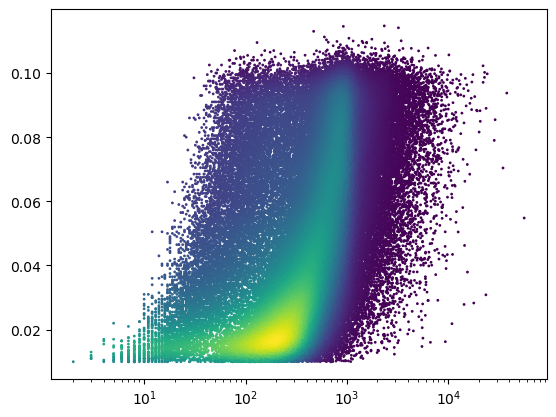

In [8]:
plt.scatter(-meta_df[:, 1], meta_df[:, 3], s=1, c=z)
plt.xscale("log")
#plt.yscale("log")

### Examining range of generations

In [26]:
min_af = 0.25
max_af = 0.95

mask = np.logical_and(meta_df[:, 4] > min_af, meta_df[:, 4] < max_af)

In [27]:
np.sum(mask)

66765

In [28]:
gen = meta_df[:, 2]
sc = meta_df[:, 0]
AF = meta_df[:, 4]

In [31]:
gen = meta_df[mask, 2]
sc = meta_df[mask, 0]
AF = meta_df[mask, 4]

In [34]:
gen = meta_df[~mask, 2]
sc = meta_df[~mask, 0]
AF = meta_df[~mask, 4]

In [9]:
# set colormap
af_cmap = cm.get_cmap("summer", 101)
af_colour = af_cmap(np.linspace(0, 1, 101))

lost = np.array([0/256, 0/256, 0/256, 1])
low = np.array([128/256, 128/256, 128/256, 1])
high = np.array([255/256, 215/256, 0/256, 1])
fixed = np.array([255/256, 165/256, 0/256, 1])

af_colour[:1, :] = lost
af_colour[1:int(min_af*100), :] = low
af_colour[int(max_af*100):99, :] = high
af_colour[99:, :] = fixed

af_cmap = colors.ListedColormap(af_colour)

# af_cmap.set_over(color="#FF4500", alpha=0.3)
# af_cmap.set_under(color="#D0D0D0", alpha=0.3)

/tmp/ipykernel_2957888/3008993668.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  af_cmap = cm.get_cmap("summer", 101)


In [10]:
sc_min, sc_max, gen_min, gen_max = 0.0008, 0.021, 45, 10000

In [ ]:
sc_range = np.logspace(-3, 0, num=100)

In [11]:
sc_range = np.linspace(sc_min, sc_max)

In [12]:
def log_log_lin(sc_vec, k, b):
    return 10**b*np.power(sc_vec, -k)

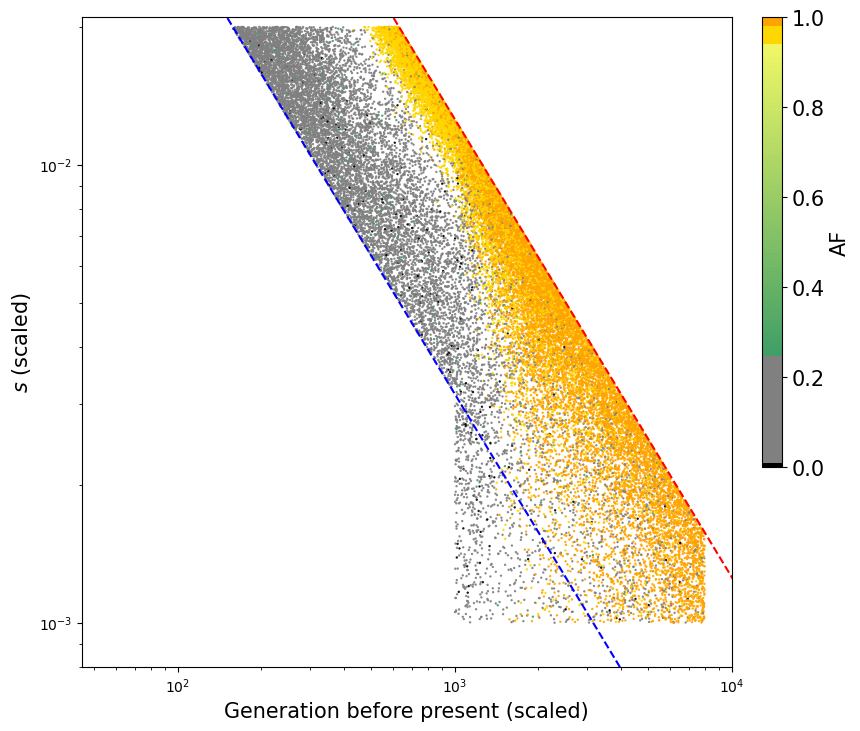

In [35]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h+0.01, bottom+0.2, 0.02, height-0.2]

# start with a rectangular Figure
plt.figure(1, figsize=(10, 10))

axScatter = plt.axes(rect_scatter)
#axDem = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)


# the scatter plot:
axScatter.scatter(gen, sc, c=AF, s=0.5, cmap=af_cmap, vmin=0, vmax=1, alpha=0.9) # change vmin, vmax!!

k = 1
b1 = 0.5
b2 = 1.1
axScatter.plot(log_log_lin(sc_range, k, b1), sc_range, "b--")
axScatter.plot(log_log_lin(sc_range, k, b2), sc_range, "r--")

# axScatter.axvline(x=158, ymin=0.001, ymax=1, c='#56B4E9', ls='-')
# axScatter.axvline(x=629, ymin=0.001, ymax=1, c='#56B4E9', ls='-')
# axScatter.axvline(x=2000, ymin=0.001, ymax=1, c='#F0E442', ls='-')
# axScatter.axvline(x=8000, ymin=0.001, ymax=1, c='#F0E442', ls='-')

axScatter.set_xlim((gen_min, gen_max))
axScatter.set_ylim((sc_min, sc_max))
axScatter.set_xlabel("Generation before present (scaled)", fontsize=15)
axScatter.set_ylabel("$s$ (scaled)", fontsize=15)
axScatter.set_yscale("log")
axScatter.set_xscale("log")

cbar = plt.colorbar(cm.ScalarMappable(cmap=af_cmap), cax=axHisty)
cbar.set_label('AF',size=15)
cbar.ax.tick_params(labelsize=15) 

#plt.savefig("/Users/mo/Desktop/sc_gen.001.01.pdf")
plt.show()

(array([ 492.,  490.,  456.,  480.,  462.,  491.,  507.,  505.,  538.,
         490.,  504.,  525.,  541.,  518.,  528.,  506.,  519.,  554.,
         515.,  509.,  587.,  512.,  548.,  553.,  499.,  498.,  537.,
         516.,  516.,  516.,  545.,  510.,  511.,  539.,  546.,  539.,
         513.,  541.,  478.,  516.,  528.,  514.,  556.,  531.,  517.,
         511.,  516.,  525.,  552.,  525.,  520.,  552.,  551.,  557.,
         551.,  561.,  546.,  539.,  589.,  567.,  538.,  615.,  563.,
         635.,  572.,  652.,  578.,  601.,  660.,  660.,  664.,  688.,
         671.,  682.,  716.,  726.,  766.,  744.,  723.,  809.,  786.,
         847.,  860.,  871.,  861.,  930.,  950.,  964.,  972., 1024.,
        1064., 1175., 1114., 1207., 1219., 1322., 1330., 1404., 1513.,
        1631.]),
 array([0.25005 , 0.257049, 0.264048, 0.271047, 0.278046, 0.285045,
        0.292044, 0.299043, 0.306042, 0.313041, 0.32004 , 0.327039,
        0.334038, 0.341037, 0.348036, 0.355035, 0.362034, 0.369033

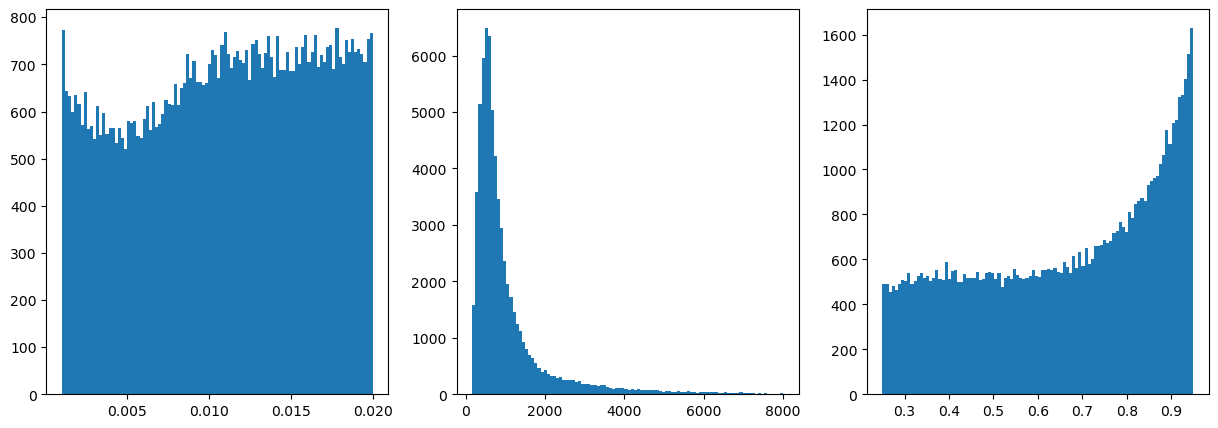

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))#, sharex=True, sharey=True)

ax1.hist(sc, bins=100)
ax2.hist(gen, bins=100)
ax3.hist(AF, bins=100)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharex=True, sharey=True)

# the scatter plot:
ax1.scatter(tru_gen, tru_sc, c=tru_AF, s=0.5, cmap=af_cmap, vmin=0, vmax=1, alpha=0.9) # change vmin, vmax!!
ax2.scatter(inf_gen, inf_sc, c=inf_AF, s=0.5, cmap=af_cmap, vmin=0, vmax=1, alpha=0.9) # change vmin, vmax!!


k = 1
b1 = 0.7
b2 = 1.3
ax1.plot(log_log_lin(sc_range, k, b1), sc_range, "b--")
ax1.plot(log_log_lin(sc_range, k, b2), sc_range, "r--")
ax1.axhline(0.003)

b3 = 0.6
b4 = 1.18
ax2.plot(log_log_lin(sc_range, k, b3), sc_range, "b--")
ax2.plot(log_log_lin(sc_range, k, b4), sc_range, "r--")
ax2.axhline(0.003)

#axScatter.axvline(x=2480, ymin=0.1, ymax=1, c='lightblue', ls='-')
#early_gen = np.around(np.maximum(2475 - 500*np.exp(-6*(sc_range-0.1)), 2460 - 180*np.exp(-7*(sc_range-0.1))))
#axScatter.plot(early_gen, sc_range, "g--") # Early generation fit
#late_gen = np.clip(np.around(2485 - 85*np.exp(-6.8*(sc_range-0.1))), a_min=2200, a_max=2480)
#axScatter.plot(late_gen, sc_range, "r--") # Late generation fit

ax1.set_xlim((gen_min, gen_max))
ax1.set_ylim((sc_min, sc_max))
# axScatter.set_xlabel("Generation before present (scaled)", fontsize=15)
# axScatter.set_ylabel("$s$ (scaled)", fontsize=15)
ax1.set_yscale("log")
ax1.set_xscale("log")

# cbar = plt.colorbar(cm.ScalarMappable(cmap=af_cmap), cax=axHisty)
# cbar.set_label('AF',size=15)
# cbar.ax.tick_params(labelsize=15) 

#plt.savefig("/Users/mo/Desktop/sc_gen.001.01.pdf")
plt.show()

In [37]:
log_log_lin(0.001, k, b1), log_log_lin(0.001, k, b2), log_log_lin(0.02, k, b1), log_log_lin(0.02, k, b2)

(3162.2776601683795, 12589.254117941675, 158.11388300841895, 629.4627058970837)

In [ ]:
np.exp(np.linspace(np.log(0.01), np.log(0.25), num=30))

In [ ]:
np.exp(np.linspace(np.log(631), np.log(1995), num=30)).astype(int)

In [ ]:
bool(np.random.randint(2))

In [ ]:
bins[::-1]

In [ ]:
bins = 1.25 - np.geomspace(0.25, 1, 10)

In [ ]:
bins

In [ ]:
plt.hist(AF[gen < log_log_lin(sc, k, 1.1)], bins=bins[::-1])
plt.xscale('log')

In [ ]:
plt.hist(AF[gen < log_log_lin(sc, k, 1.48)])

### Inspecting the sampling scheme (after simulations done)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

In [ ]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots(figsize=(15, 5))
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax

In [ ]:
meta_df = np.genfromtxt('Ugi_1116_sft_scale10.meta', usecols=(1, 2, 3, 4, 5), invalid_raise=False)

In [ ]:
meta_data = np.genfromtxt(f"SASC_1116_sft_scale10.meta", usecols=(1, 2, 3, 4, 5, 6), dtype=None, encoding=None)

In [ ]:
meta_data.shape

In [ ]:
list(meta_data[43215])

In [ ]:
list(meta_data[12456])[:5], meta_data[12456][5]

In [ ]:
meta_data

In [ ]:
## For sft swp only: examine drift gen vs. init freq.


#fig, main_ax = plt.subplots(figsize=(10, 5))

#main_ax.scatter(-meta_df[:, 1], meta_df[:, 3], c=z, s=1)
#main_ax.set_yscale("log")
#main_ax.set_xscale("log")

ax = density_scatter(-meta_df[:, 1], meta_df[:, 3], bins = [100,100], s=1)
ax.set_xlim(0, 10000)
plt.show()

In [ ]:
sc_range = np.linspace(0.1, 1)
gen = meta_df[:, 2]
sc = meta_df[:, 0]
AF = meta_df[:, 4]

In [ ]:
np.min(sc)

In [ ]:
plt.scatter(gen, sc)

In [ ]:
np.max(gen)

In [ ]:
plt.hist(gen)

In [ ]:
#
plt.hist(np.minimum(50+np.random.exponential(200, 50000), 2000))

In [ ]:
np.max(np.minimum(50+np.random.exponential(180, 50000), 2000))

In [ ]:
plt.hist(np.exp(np.random.uniform(np.log(50), np.log(1900), 500)))

In [ ]:
### Plot gen v sel coef ###
# set colormap
af_cmap = cm.get_cmap(name="copper")

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h+0.01, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
#axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(meta_df[:, 2], meta_df[:, 0], c=meta_df[:, 4], s=1, cmap=af_cmap, vmin=0, vmax=0.95, alpha=0.5) # change vmin, vmax!!
#early_gen = np.around(np.maximum(2475 - 500*np.exp(-6*(sc_range-0.1)), 2460 - 180*np.exp(-7*(sc_range-0.1))))
#axScatter.plot(early_gen, sc_range, "g--") # Early generation fit
#late_gen = np.clip(np.around(2485 - 85*np.exp(-6.8*(sc_range-0.1))), a_min=2200, a_max=2480)
#axScatter.plot(late_gen, sc_range, "r--") # Late generation fit

#axScatter.set_xlim((2200, 2500))
#axScatter.set_ylim((0, 1))
axScatter.set_xlabel("Generation (scaled)")
axScatter.set_ylabel("Sel coef (scaled)")
axScatter.set_yscale("log")
axScatter.set_xscale("log")

bins = 50
# axHistx.hist([x[~cat], x[cat]], alpha=0.5, bins=bins, color=[neg_color, pos_color], stacked=True)
axHistx.hist(meta_df[:, 2], alpha=0.5, bins=bins)


# axHisty.hist([y[~cat], y[cat]], alpha=0.5, bins=bins, orientation='horizontal', color=[neg_color, pos_color], stacked=True)
axHisty.hist(meta_df[:, 0], alpha=0.5, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
# axHisty.set_xlim((0, 500))
axHistx.set_xticks([])
axHisty.set_yticks([])

plt.colorbar(cm.ScalarMappable(cmap=af_cmap))
#plt.savefig(file_path+"_distr.pdf")
plt.show()

In [ ]:
## Plot sel coef v. AF ##

no_bin = 20
hist_cmap = cm.get_cmap(name="Greys")
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h+0.01, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
#axHisty.yaxis.set_major_formatter(nullfmt)

# 2D histogram:
_, _, _, im = axScatter.hist2d(meta_df[:, 0], meta_df[:, 4], bins=no_bin, cmap=hist_cmap, vmin=0)

#axScatter.set_xlim((0, 1))
#axScatter.set_ylim((0, 1))
axScatter.set_xlabel("Sel coef (scaled)")
axScatter.set_ylabel("Ending AF")

axHistx.hist(meta_df[:, 0], alpha=0.5, bins=no_bin)
axHisty.hist(meta_df[:, 4], alpha=0.5, bins=no_bin, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
# axHisty.set_xlim((0, 500))
axHistx.set_xticks([])
axHisty.set_yticks([])

plt.colorbar(im)
#plt.savefig(file_path+"_distr.pdf")
plt.show()